# ALP - Michell Thesea C - 0706022110003


- Perform data preparations to clean data
- Exploratory Data Analysis (explore the distributions and characteristics of the columns and compare variables to view their behavior and relationships)
- Cluster the data using K-Means, Hierarchical Clustering
- Create a prediction model using any classification algorithm and compare the results
- Submit your result through Github with the code run and showing results

In [1]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn import tree
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv('data.csv', sep=';')
df.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [3]:
df.isna().sum()

Marital status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
Daytime/evening attendance\t                      0
Previous qualification                            0
Previous qualification (grade)                    0
Nacionality                                       0
Mother's qualification                            0
Father's qualification                            0
Mother's occupation                               0
Father's occupation                               0
Admission grade                                   0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                                            0
Scholarship holder                                0
Age at enrol

In [4]:
df.duplicated().sum()

0

In [5]:
df.describe()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,...,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000
mean,1.178571,18.669078,1.727848,8856.642631,0.890823,4.577758,132.613314,1.873192,19.561935,22.275316,...,0.137658,0.541817,6.232143,8.063291,4.435805,10.230206,0.150316,11.566139,1.228029,0.001969
std,0.605747,17.484682,1.313793,2063.566416,0.311897,10.216592,13.188332,6.914514,15.603186,15.343108,...,0.690880,1.918546,2.195951,3.947951,3.014764,5.210808,0.753774,2.663850,1.382711,2.269935
min,1.000000,1.000000,0.000000,33.000000,0.000000,1.000000,95.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000
25%,1.000000,1.000000,1.000000,9085.000000,1.000000,1.000000,125.000000,1.000000,2.000000,3.000000,...,0.000000,0.000000,5.000000,6.000000,2.000000,10.750000,0.000000,9.400000,0.300000,-1.700000
50%,1.000000,17.000000,1.000000,9238.000000,1.000000,1.000000,133.100000,1.000000,19.000000,19.000000,...,0.000000,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000
75%,1.000000,39.000000,2.000000,9556.000000,1.000000,1.000000,140.000000,1.000000,37.000000,37.000000,...,0.000000,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000,13.900000,2.600000,1.790000
max,6.000000,57.000000,9.000000,9991.000000,1.000000,43.000000,190.000000,109.000000,44.000000,44.000000,...,12.000000,19.000000,23.000000,33.000000,20.000000,18.571429,12.000000,16.200000,3.700000,3.510000


/var/folders/9f/z4f5qxnj21d6zsj419hzs5yw0000gn/T/ipykernel_85983/2179791397.py:2: UserWarning: Glyph 9 (	) missing from current font.
  plt.tight_layout()
/Users/michelltc/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


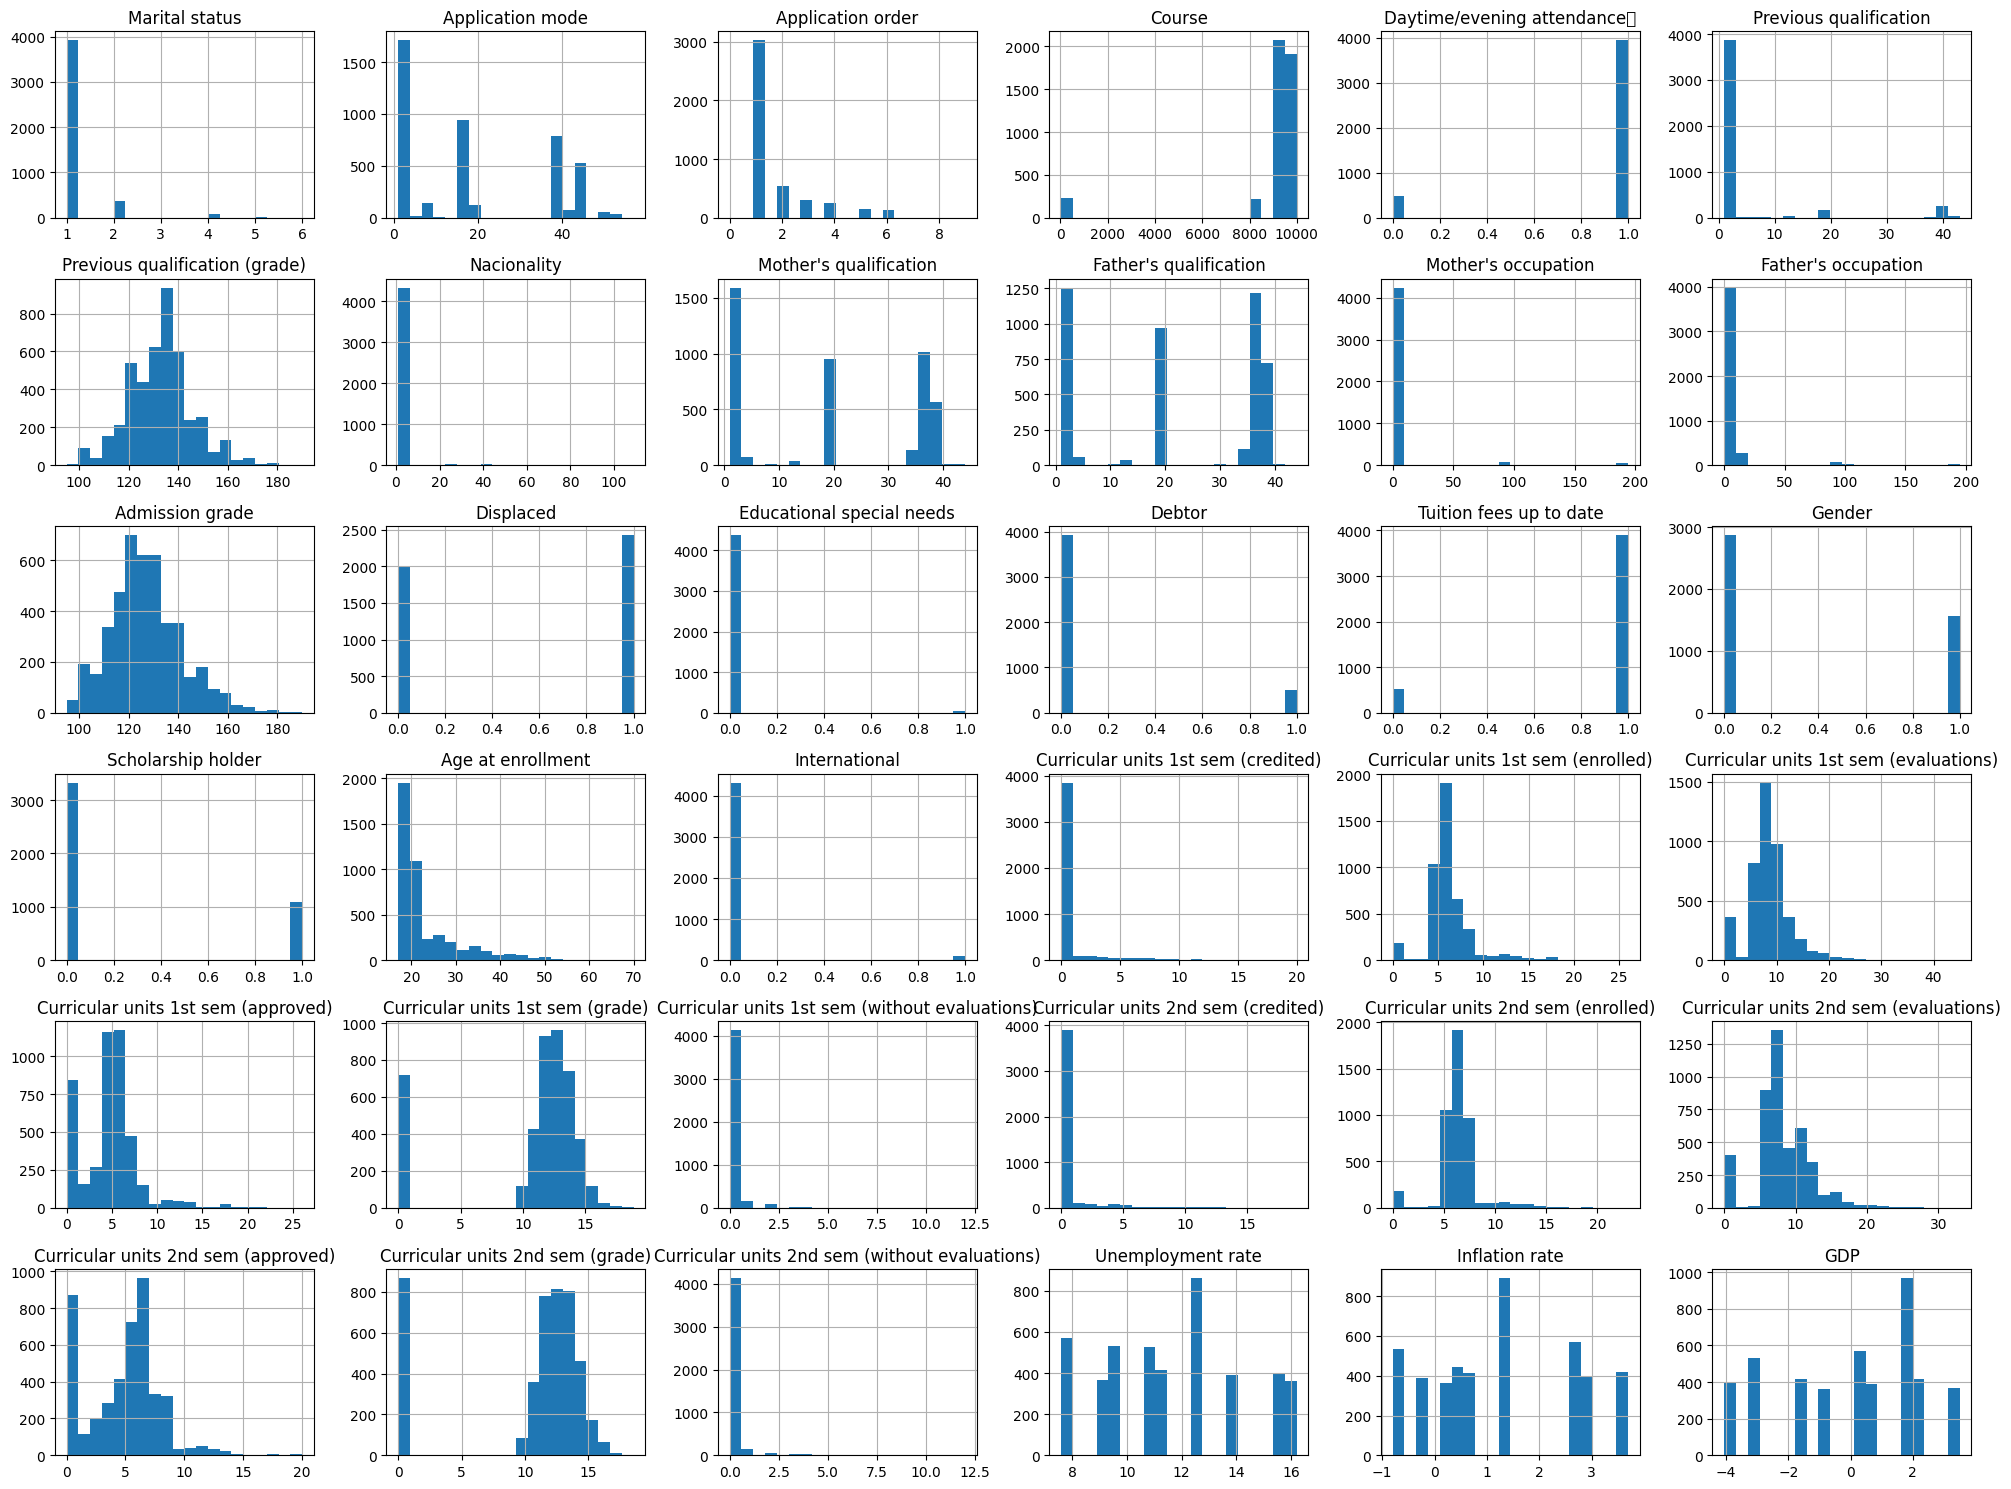

In [6]:
df.hist(bins=20, figsize=(20,15))
plt.tight_layout()
plt.show()

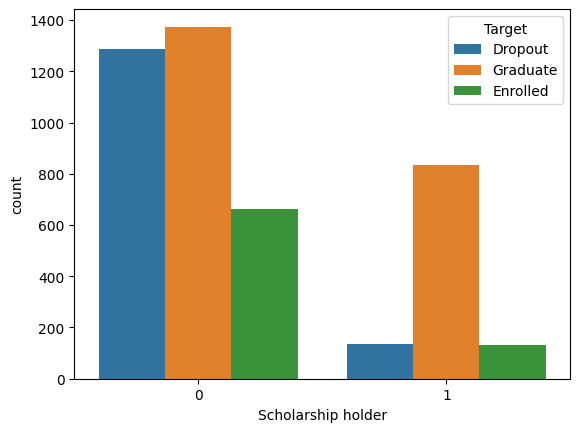

In [7]:
sns.countplot(x='Scholarship holder', hue='Target', data=df)
plt.show()

^^^ 1 – yes 0 – no
Murid yang non-scholarship holder cenderung lebih banyak yang dropout dibanding dengan yang scholarship holder.

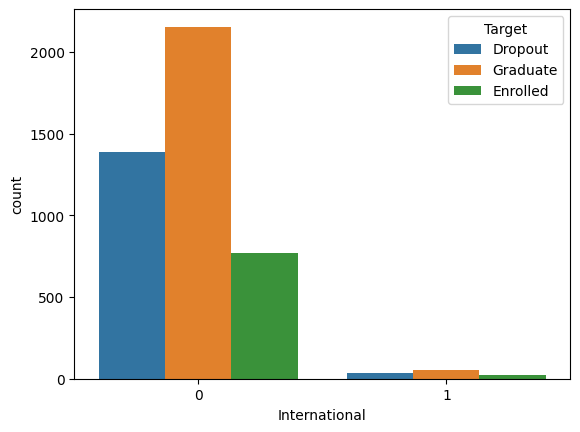

In [8]:
sns.countplot(x='International', hue='Target', data=df)
plt.show()

^^^ 1 – yes 0 – no
Chance dropout murid international jauh lebih sedikit dibanding yang local. Tapi perbandingan international dropout sama international graduate similar sama yang local.

In [9]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['Target'] = label_encoder.fit_transform(df['Target'])
df.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,0
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,2
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,0
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,2
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,2


In [10]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)
df_scaled = pd.DataFrame(scaled_data, columns=df.columns)
df_scaled.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,-0.294829,-0.095470,2.490896,-4.209520,0.350082,-0.35023,-0.804841,-0.126298,-0.036018,-0.669778,...,-0.282442,-2.838337,-2.042630,-1.471527,-1.963489,-0.199441,-0.287638,0.124386,0.765761,-1.326497
1,-0.294829,-0.209869,-0.554068,0.192580,0.350082,-0.35023,2.076819,-0.126298,-1.189759,-1.256427,...,-0.282442,-0.105726,-0.522682,0.518904,0.659562,-0.199441,0.876222,-1.105222,0.347199,0.925392
2,-0.294829,-1.010660,2.490896,0.103404,0.350082,-0.35023,-0.804841,-0.126298,1.117723,0.959802,...,-0.282442,-0.105726,-2.042630,-1.471527,-1.963489,-0.199441,-0.287638,0.124386,0.765761,-1.326497
3,-0.294829,-0.095470,0.207173,0.444115,0.350082,-0.35023,-0.804841,-0.126298,1.181819,0.959802,...,-0.282442,-0.105726,0.490616,0.187165,0.416450,-0.199441,-0.813253,-1.466871,-1.375511,0.925392
4,1.356212,1.162916,-0.554068,-0.408389,-2.856470,-0.35023,-2.473171,-0.126298,1.117723,1.024985,...,-0.282442,-0.105726,-0.522682,0.518904,0.531608,-0.199441,0.876222,-1.105222,0.347199,0.925392


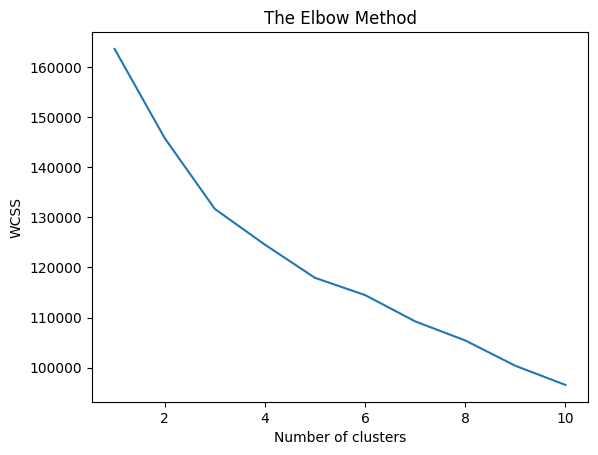

In [11]:
from sklearn.cluster import KMeans

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'random', random_state = 42, n_init='auto')
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [12]:
from kneed import KneeLocator

kLocator = KneeLocator(range(1, 11), wcss, curve='convex', direction='decreasing')
print('Number of Clusters: ', kLocator.elbow)

Number of Clusters:  3


In [13]:
kmeans = KMeans(n_clusters = 3, init = 'random', random_state = 42, n_init='auto')
kmeans.fit(df_scaled)
y_pred = kmeans.predict(df_scaled)
df['Cluster'] = y_pred
df.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target,Cluster
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0.000000,0,10.8,1.4,1.74,0,0
1,1,15,1,9254,1,1,160.0,1,1,3,...,6,6,6,13.666667,0,13.9,-0.3,0.79,2,1
2,1,1,5,9070,1,1,122.0,1,37,37,...,6,0,0,0.000000,0,10.8,1.4,1.74,0,0
3,1,17,2,9773,1,1,122.0,1,38,37,...,6,10,5,12.400000,0,9.4,-0.8,-3.12,2,1
4,2,39,1,8014,0,1,100.0,1,37,38,...,6,6,6,13.000000,0,13.9,-0.3,0.79,2,1


In [14]:
from sklearn.linear_model import LogisticRegression
#rom sklearn.preprocessing import StandardScaler
#from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

---

In [15]:
x = df.drop(columns='Target', axis=1) # features
x.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Cluster
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,0
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,1
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,0
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,1
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,1


In [16]:
y = df['Target'] # label
y.head()

0    0
1    2
2    0
3    2
4    2
Name: Target, dtype: int64

In [17]:
from sklearn.model_selection import train_test_split, GridSearchCV
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((3539, 37), (885, 37), (3539,), (885,))

In [18]:
from sklearn.ensemble import RandomForestClassifier
modelRandomForestClassifier = RandomForestClassifier()
modelRandomForestClassifier.fit(X_train, y_train)

RandomForestClassifier()

In [19]:
X_train_prediction_random_forest = modelRandomForestClassifier.predict(X_train)
trainingAccuracyOfRandomForest = accuracy_score(y_train, X_train_prediction_random_forest)
trainingAccuracyOfRandomForest

1.0

In [20]:
X_test_prediction_random_forest = modelRandomForestClassifier.predict(X_test)
testingAccuracyOfRandomForest = accuracy_score(y_test, X_test_prediction_random_forest)
print('accuracy:',testingAccuracyOfRandomForest)

accuracy: 0.7694915254237288


--- decision tree

In [22]:
from sklearn.tree import DecisionTreeClassifier
modelDecisionTree = DecisionTreeClassifier()
modelDecisionTree.fit(X_train, y_train)

DecisionTreeClassifier()

In [23]:
X_train_prediction_decision_tree = modelDecisionTree.predict(X_train)
trainingAccuracyDecisionTree = accuracy_score(y_train, X_train_prediction_decision_tree)
trainingAccuracyDecisionTree

1.0

In [24]:
X_test_prediction_decision_tree = modelDecisionTree.predict(X_test)
testingAccuracyDecisionTree = accuracy_score(y_test, X_test_prediction_decision_tree)
testingAccuracyDecisionTree

0.6926553672316385